# Two-way ANOVA

## 背景描述

实验研究了操作温度和三种面板玻璃材料对示波器管输出光的影响。

这是一个材料（因子𝐴）水平数 $𝑎=3$，温度（因子𝐵）水平数 $𝑏=3$ 和重复次数 $𝑛=3$ 的双因子实验。

## 数据描述

|         变量名         |   变量含义   |       变量类型       |  变量取值范围   |
| :--------------------: | :----------: | :------------------: | :-------------: |
|  （自变量）Glass_Type  | 玻璃材料类型 | categorical variable |    [1，2，3]    |
| （自变量）Temperature  |     温度     | continuous variable  | [100, 125, 150] |
| （因变量）Light_Output |    输出光    | continuous variable  |      Real       |

## 问题

注：这里使用 \alpha=0.05 的显著性水平

1. 试判断玻璃类型和温度对输出光是否有显著影响.
2. 用适合的残差图来检验设定模型的恰当性.
3. 选出一种玻璃类型 使得不论温度高低都能使示波器管的输出光较高.
4. 估计参数$\mu$、$\tau_i$、$\beta_j$和$(\tau\beta)_{ij}\quad(i=1,...,a;j=1,...,b)$
5. 如何对这种示波器管的输出光进行预测？

## 解决方案

**Q1:**  
检验行处理效应的等式假设:  $𝐻_{01}:\tau_1=\tau_2=\cdots=\tau_a=0$  vs  $𝐻_{11}:\tau_i \neq 0, \exists i$  
检验列处理效应的等式假设:  $𝐻_{02}:\beta_1=\beta_2=\cdots=\beta_b=0$  vs  $𝐻_{12}:\beta_j \neq 0, \exists j$  
检验行与列处理没有交互作用假设:  $𝐻_{03}:(\tau\beta)_{ij}=0, \forall i,j$  vs  $𝐻_{13}:(\tau\beta)_{ij} \neq 0, \exists i,j$  

In [1]:
# Import standard packages
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

# Import additional packages
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)

alpha = 0.05
a = 3
b = 3
n = 3

x = pd.read_csv('data/Project3.csv')
data = x.values
df = pd.DataFrame(data, columns = ['Glass', 'Temp', 'Light'])
print(df.head())

# Do the two-way ANOVA
model = ols('Light~ C(Glass) + C(Temp) + C(Glass):C(Temp)',df).fit()
anova_results = round(anova_lm(model), 4)
print('\n双因素方差分析表：\n', anova_results)

if anova_results['PR(>F)'][0] < 0.05:
    print('\nFor material, p-value: %f < 0.05, reject H01.'% anova_results['PR(>F)'][0])
else:
    print('\nFor material, accept H01.')

if anova_results['PR(>F)'][1] < 0.05:
    print('\nFor temperature, p-value: %f < 0.05, reject H02.'% anova_results['PR(>F)'][1])
else:
    print('\nFor temperature, accept H02.')
    
if anova_results['PR(>F)'][2] < 0.05:
    print('\nFor material:temp, p-value: %f < 0.05, reject H03.'% anova_results['PR(>F)'][2])
else:
    print('\nFor material:temp, accept H03.')

   Glass  Temp  Light
0      1   100    580
1      1   100    568
2      1   100    570
3      2   100    550
4      2   100    530

双因素方差分析表：
                     df        sum_sq      mean_sq          F  PR(>F)
C(Glass)           2.0  1.508645e+05   75432.2593   206.3706     0.0
C(Temp)            2.0  1.970335e+06  985167.2593  2695.2595     0.0
C(Glass):C(Temp)   4.0  2.905517e+05   72637.9259   198.7257     0.0
Residual          18.0  6.579333e+03     365.5185        NaN     NaN

For material, p-value: 0.000000 < 0.05, reject H01.

For temperature, p-value: 0.000000 < 0.05, reject H02.

For material:temp, p-value: 0.000000 < 0.05, reject H03.


由上面的方差分析表可知，在$\alpha=0.05$的水平下：  
对面板玻璃材料来说，$p=0.0000<0.05$，所以面板玻璃材料对示波器管输出光有显著影响；  
对温度来说，$p=0.0000<0.05$，所以温度对输出光也具有显著影响；  
对板极材料和温度的交互因素来说，$p=0.0000<0.05$，所以两者交互因素对输出光也具有显著影响.

【多重比较】在双因子析因设计实验中，如果交互作用是显著的，一个因子（例如，因子 𝐴）的均值间的比较可能由于交互作用而模糊不清。解决这类问题的方法是：将另一个因子（因子 𝐵）固定在一特定水平上，在此水平上对因子 𝐴 的均值使用 Tukey 检验法。  
由上面方差分析表可知，行均值、列均值和交互项均有显著性差异，所以下面我们进一步固定温度水平为 125℉，对 3 种材料进行多重比较，以Tukey的Honestly Significant Difference(HSD)检验法为例: 

固定温度水平为 125℉: 三种材料之间的多重比较: 
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper  reject
------------------------------------------------------
     1      2 -52.3333 0.0523 -105.2908  0.6241  False
     1      3 -32.6667  0.221  -85.6241 20.2908  False
     2      3  19.6667 0.5285  -33.2908 72.6241  False
------------------------------------------------------




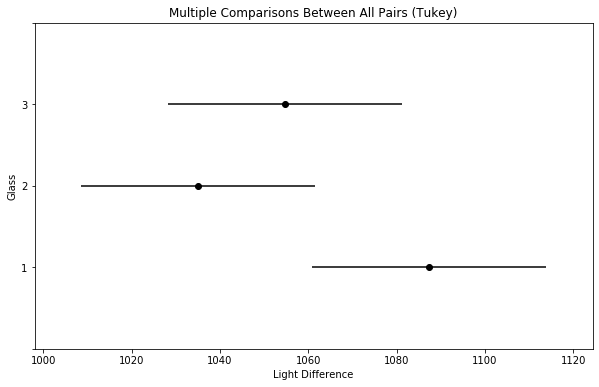

In [2]:
# 使用Tukey HSD 检验法进行多重比较
multiComp = MultiComparison(df.loc[df['Temp'] == 125, 'Light'], df.loc[df['Temp'] == 125, 'Glass'])
tukey = multiComp.tukeyhsd()
print('固定温度水平为 125℉: 三种材料之间的多重比较: \n', tukey)

tukey.plot_simultaneous(ylabel= 'Glass', xlabel= 'Light Difference')
print('\n')

结果说明：  
这一分析表明，当温度水平为 125℉ 时，三种材料下对应的输出光情况是相同的。下面分别固定温度为100与150，继续进行多重比较。

固定温度水平为 100℉: 三种材料之间的多重比较: 
  Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2 -19.6667 0.5305 -72.8012 33.4678  False
     1      3   0.6667    0.9 -52.4678 53.8012  False
     2      3  20.3333 0.5103 -32.8012 73.4678  False
-----------------------------------------------------




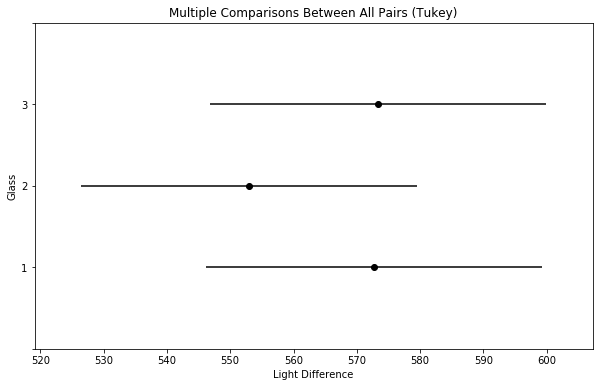

In [3]:
# 使用Tukey HSD 检验法进行多重比较
multiComp = MultiComparison(df.loc[df['Temp'] == 100, 'Light'], df.loc[df['Temp'] == 100, 'Glass'])
tukey = multiComp.tukeyhsd()
print('固定温度水平为 100℉: 三种材料之间的多重比较: \n', tukey)

tukey.plot_simultaneous(ylabel= 'Glass', xlabel= 'Light Difference')
print('\n')

固定温度水平为 150℉: 三种材料之间的多重比较: 
    Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
     1      2     -73.0 0.0017 -108.1909  -37.8091   True
     1      3 -499.3333  0.001 -534.5242 -464.1424   True
     2      3 -426.3333  0.001 -461.5242 -391.1424   True
---------------------------------------------------------




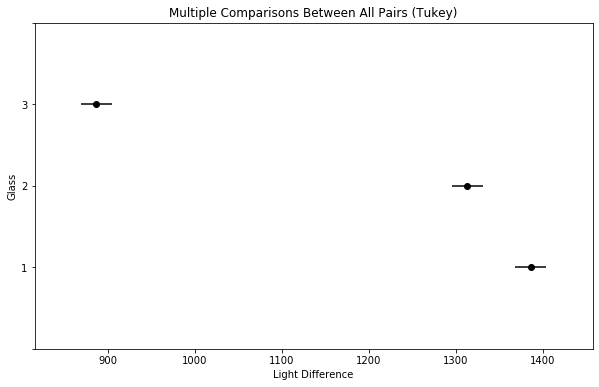

In [4]:
# 使用Tukey HSD 检验法进行多重比较
multiComp = MultiComparison(df.loc[df['Temp'] == 150, 'Light'], df.loc[df['Temp'] == 150, 'Glass'])
tukey = multiComp.tukeyhsd()
print('固定温度水平为 150℉: 三种材料之间的多重比较: \n', tukey)

tukey.plot_simultaneous(ylabel= 'Glass', xlabel= 'Light Difference')
print('\n')

这样得出结论：高温下（150℉)三种材料输出光情况差异显著。而100℉与125℉均无差异。

**Q2:**  
检验设定模型的恰当性：  
**残差分析0: 计算输出光数据的残差**

In [5]:
# 计算电池寿命数据的残差
list_temp = [100, 125, 150]
data_res = data.astype(float)
# 循环不是必须更改
for j in list_temp:
    for i in range(a):
        cnt = data[(data[:,0] == i + 1) & (data[:,1] == j),2]
        data_res[(data_res[:,0] == i + 1) & (data_res[:,1] == j),2] = cnt-np.mean(cnt)
df = pd.DataFrame(data_res, columns = ['Glass', 'Temp', 'Light_res'])
print(df)

    Glass   Temp  Light_res
0     1.0  100.0   7.333333
1     1.0  100.0  -4.666667
2     1.0  100.0  -2.666667
3     2.0  100.0  -3.000000
4     2.0  100.0 -23.000000
5     2.0  100.0  26.000000
6     3.0  100.0 -27.333333
7     3.0  100.0   1.666667
8     3.0  100.0  25.666667
9     1.0  125.0   2.666667
10    1.0  125.0  -0.333333
11    1.0  125.0  -2.333333
12    2.0  125.0  35.000000
13    2.0  125.0   0.000000
14    2.0  125.0 -35.000000
15    3.0  125.0  -9.666667
16    3.0  125.0  -1.666667
17    3.0  125.0  11.333333
18    1.0  150.0   6.000000
19    1.0  150.0  -6.000000
20    1.0  150.0   0.000000
21    2.0  150.0  15.000000
22    2.0  150.0  -1.000000
23    2.0  150.0 -14.000000
24    3.0  150.0 -19.666667
25    3.0  150.0  17.333333
26    3.0  150.0   2.333333


**残差分析1: 残差的正态概率图** 

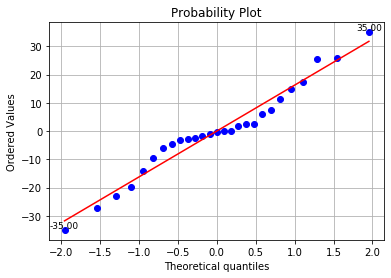

[-35.         -27.33333333 -23.         -19.66666667 -14.
  -9.66666667  -6.          -4.66666667  -3.          -2.66666667
  -2.33333333  -1.66666667  -1.          -0.33333333   0.
   0.           1.66666667   2.33333333   2.66666667   6.
   7.33333333  11.33333333  15.          17.33333333  25.66666667
  26.          35.        ]


In [6]:
# 残差的正态概率图
res = data_res[:, 2]
osm, osr = stats.probplot(res, dist = 'norm', plot = plt)
x = osm[0][0]
y = osm[1][0]
plt.text(x, y, '%.2f' % float(y), ha='center', va= 'bottom', fontsize=9)
x2 = osm[0][-1]
y2 = osm[1][-1]
plt.text(x2, y2, '%.2f' % float(y2), ha = 'center', va = 'bottom',fontsize = 9)
plt.grid()
plt.show()

print(osm[1])

In [7]:
# 计算MSE
sse = 0
for r in data_res[:,2]:
    sse += r**2
mse = sse/(a*b*(n-1))
print('MSE为',mse)

MSE为 365.5185185185185


无特别的证据说明违背数据正态性；
异常值的检测：
$35/\sqrt{365.52}=1.83<2$

说明无明显的异常值，说明残差是服从正态分布的。  
  
(计算标准化残差：$d_{ij} = \frac{e_{ij}}{\sqrt{MS_E}}$。一般地，标准化残差约 68% 落在 ±1 之内，约 95% 落在 ±2 之内，几乎全部落在 ±3 之内。标准化残差的绝对值大于3的残差是一个可能的异常值。)

In [8]:
# 用Shapiro-Wilk检验进行正态性检验
SW, pVal = stats.shapiro(res)
print(round(SW, 2))
print(round(pVal, 2))

if pVal > alpha:
    print('\nAccept the null hypothesis.')
else:
    print('\nSince p-value > 0.05, reject the null hypothesis') 

0.97
0.52

Accept the null hypothesis.


由上述分析可知，统计量为 0.97，接近 1；且P值为 0.52，大于指定的显著性水平 0.05。故认为残差来自服从正态分布的总体。

**残差分析2: 残差与预测值的关系图**  

In [9]:
# 残差与预测值的关系图
y2 = []
# !!观察原始数据 这个嵌套循环必须改
for j in list_temp:
    for i in range(a):
        for k in range(n):
            y2.append(np.mean(data[(data[:,0] == i + 1) & (data[:,1] == j), 2]))
print(y2)

[572.6666666666666, 572.6666666666666, 572.6666666666666, 553.0, 553.0, 553.0, 573.3333333333334, 573.3333333333334, 573.3333333333334, 1087.3333333333333, 1087.3333333333333, 1087.3333333333333, 1035.0, 1035.0, 1035.0, 1054.6666666666667, 1054.6666666666667, 1054.6666666666667, 1386.0, 1386.0, 1386.0, 1313.0, 1313.0, 1313.0, 886.6666666666666, 886.6666666666666, 886.6666666666666]


Text(0, 0.5, 'e_ijk')

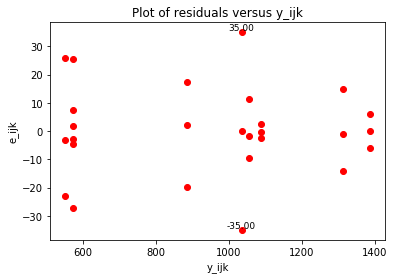

In [10]:
plt.scatter(y2, res, c = 'red')
plt.text(y2[12], res[12], '%.2f' % float(res[12]), ha='center', va= 'bottom', fontsize=9)
plt.text(y2[12], res[14], '%.2f' % float(res[14]), ha='center', va= 'bottom', fontsize=9)
plt.title('Plot of residuals versus y_ijk')
plt.xlabel('y_ijk')
plt.ylabel('e_ijk')

由上图可以看出，当输出光增高时，残差方差并无显著变化趋势，有轻微的增长。

**残差分析3：残差与材料的关系图** 

Text(0, 0.5, 'e_ijk')

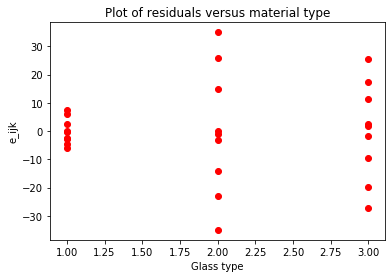

In [11]:
# 残差对材料种类的关系图
y3 = data_res[:,0]
plt.scatter(y3, res, c = 'red')
plt.title('Plot of residuals versus material type')
plt.xlabel('Glass type')
plt.ylabel('e_ijk')

上图显示出方差明显的不等性：材料类型为第一种时，比其他情况下方差小。

**残差分析4：残差与温度的关系图** 

Text(0, 0.5, 'e_ijk')

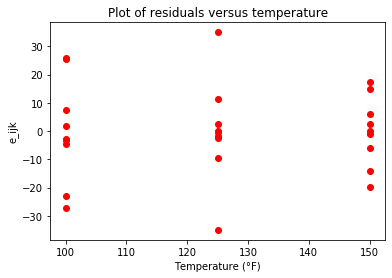

In [12]:
# 残差对温度的关系图
y4 = data_res[:,1]
plt.scatter(y4, res, c = 'red')
plt.title('Plot of residuals versus temperature')
plt.xlabel('Temperature (°F)')
plt.ylabel('e_ijk')

上图显示出方差微弱的不等性：温度为 125℉ 时，比其他情况下方差大。

在 125℉ 的温度-材料类型2 这一单元中，包含了两个极端残差值（-35.00 与 35.00）。这两个残差值对于后面三张图检验出的方差不等起了主要作用。重新审查这些数据，并未显出任何明显的问题，比如记录错误等，所有我们把这些响应作为真实数据接收下来。

**Q3:**  
为了选出一种材料，使得不论温度高低与否都能使输出光强度较高，我们进行固定效应模型分析。

In [13]:
# 固定效应模型分析
data_avg = data.astype(float) * 1
# 循环不必须改
for j in list_temp:
    for i in range(a):
        cnt = data[(data[:,0] == i + 1) & (data[:,1] == j),2]
        data_avg[(data_avg[:,0] == i + 1) & (data_avg[:,1] == j),2] = np.mean(cnt)
df = pd.DataFrame(data_avg, columns = ['Glass', 'Temperature', 'Light_avg'])
print(df)

    Glass  Temperature    Light_avg
0     1.0        100.0   572.666667
1     1.0        100.0   572.666667
2     1.0        100.0   572.666667
3     2.0        100.0   553.000000
4     2.0        100.0   553.000000
5     2.0        100.0   553.000000
6     3.0        100.0   573.333333
7     3.0        100.0   573.333333
8     3.0        100.0   573.333333
9     1.0        125.0  1087.333333
10    1.0        125.0  1087.333333
11    1.0        125.0  1087.333333
12    2.0        125.0  1035.000000
13    2.0        125.0  1035.000000
14    2.0        125.0  1035.000000
15    3.0        125.0  1054.666667
16    3.0        125.0  1054.666667
17    3.0        125.0  1054.666667
18    1.0        150.0  1386.000000
19    1.0        150.0  1386.000000
20    1.0        150.0  1386.000000
21    2.0        150.0  1313.000000
22    2.0        150.0  1313.000000
23    2.0        150.0  1313.000000
24    3.0        150.0   886.666667
25    3.0        150.0   886.666667
26    3.0        150.0   886

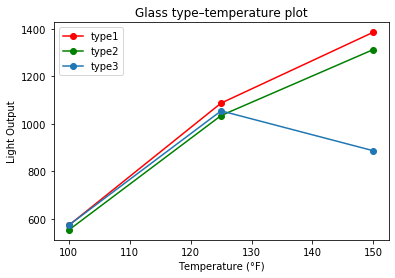

In [14]:
type1 = data_avg[[0,9,18], 2]
type2 = data_avg[[3,12,21], 2]
type3 = data_avg[[6,15,24], 2]
c1 = pd.Series(type1, index = list_temp, name = 'type1')
c2 = pd.Series(type2, index = list_temp, name = 'type2')
c3 = pd.Series(type3, index = list_temp, name = 'type3')
df = pd.concat([c1, c2, c3], axis = 1)

plt.plot(df.iloc[:,0], color = 'red', marker = 'o', label = 'type1')
plt.plot(df.iloc[:,1], color = 'green', marker = 'o', label = 'type2')
plt.plot(df.iloc[:,2], marker = 'o', label = 'type3')
plt.title('Glass type–temperature plot')
plt.xlabel('Temperature (°F)')
plt.ylabel('Light Output')
plt.legend(['type1', 'type2', 'type3'])

上图绘制了每一种处理组合的平均响应图，在从较低温到中等温度时，三种材料对应的输出光都增高，但从中等温度到高温时，材料3输出光降低，而另外两种材料依然升高，且材料1输出光更强，因此不论温度高低都能使示波器管的输出光较高的材料应选取材料1.

**Q4:**  
估计参数$\mu$、$\tau_i$、$\beta_j$和$(\tau\beta)_{ij}\quad(i=1,...,a;j=1,...,b)$  
$\hat{\mu}=\bar{y}_{\cdots}$  
$\hat{\tau_i}=\bar{y}_{i\cdot\cdot}-\bar{y}_{\cdots},\quad i = 1,2,\cdots,a$  
$\hat{\beta_j}=\bar{y}_{\cdot j\cdot}-\bar{y}_{\cdots},\quad j = 1,2,\cdots,b$  
$\hat{\tau\beta}_{ij}=\bar{y}_{ij\cdot}-\bar{y}_{i\cdot\cdot}-\bar{y}_{\cdot j\cdot}+\bar{y}_{\cdots},\quad i = 1,2,\cdots,a\quad j = 1,2,\cdots,b$

In [15]:
# 参数估计
mu = np.mean(data[:,2])
print('总平均效应：', round(mu, 2))

tau = []
for i in range(a):
    tau.append(np.mean(data[data[:,0] == i + 1, 2]) - mu)
print('材料因子的水平效应：\n', np.round(tau, 2))

beta = []
for j in list_temp:
    beta.append(np.mean(data[data[:,1] == j, 2]) - mu)
print('温度因子的水平效应：\n', np.round(beta, 2))

tau_beta = []
for i in range(a):
    tau_beta.append([])
    for j in range(b):
        cnt = data_avg[3 * i + 9 * j, 2] - tau[i] - beta[j] + mu
        tau_beta[i].append(cnt)
# 待填入的效应下标顺序为11、12、13、21....
print('两因子之间的交互作用效应：\n', np.round(tau_beta, 2))

总平均效应： 940.19
材料因子的水平效应：
 [  75.15   26.81 -101.96]
温度因子的水平效应：
 [-373.85  118.81  255.04]
两因子之间的交互作用效应：
 [[1811.56 1833.56 1996.  ]
 [1840.22 1829.56 1971.33]
 [1989.33 1978.   1673.78]]


**Q5:**  
由于温度是定量的，而材料类型是定性的。再者，温度有 3 个水平。因此，我们可计算线性的和二次的温度效应，以便研究温度怎样影响输出光。  
这里我们画出响应曲线（response curve）可以得到响应变量与定量因子——温度的关系。一般地，线性回归方法可用于为实验数据拟合相应的模型。  
$Light = \beta_0+\beta_1A+\beta_2B_1+\beta_3B_2+\beta_4A^2+\beta_5AB_1+\beta_6AB_2+\beta_7A^2B_1+\beta_8A^2B_2$  
其中，分量 $A, A^2$ 分别表示温度因子的一次效应、二次效应，$B$ 表示材料类型因子的主效应。由于温度为低、中、高水平(100℉， 125℉ ， 150℉ )，对应的温度水平分别为 $A=-1，0，+1$。变量 $B[1]$ 和 $B[2]$ 被认为是示性变量（indicator variable），其定义为:  

|  | 1 | 2 | 3 |  
| :--------: | :--------: | :--------: | :---------: |  
| $B[1]$ |   1   |   0   |   -1   |  
| $B[2]$ |   0   |   1   |   -1   |

In [16]:
# 构造这 8 个变量
list_A = [-1, 0, 1]
list_B1 = [1, 0, -1]
list_B2 = [0, 1, -1]
A = data[:,1] * 1
B1 = B2 = data[:, 0]
for i in range(3):
    A = [list_A[i] if j == list_temp[i] else j for j in A]
    B1 = [list_B1[i] if j == i + 1 else j for j in B1]
    B2 = [list_B2[i] if j == i + 1 else j for j in B2]
AA = [A[k] ** 2 for k in range(len(A))]
AB1 = [A[k] * B1[k] for k in range(len(A))]
AB2 = [A[k] * B2[k] for k in range(len(A))]
AAB1 = [AA[k] * B1[k] for k in range(len(A))]
AAB2 = [AA[k] * B2[k] for k in range(len(A))]
df = pd.DataFrame(A, columns = ['A'])
df['B1'] = B1
df['B2'] = B2
df['AA'] = AA
df['AB1'] = AB1
df['AB2'] = AB2
df['AAB1'] = AAB1
df['AAB2'] = AAB2
df['Life'] = data[:,2]
print(df.head())

# 训练模型
model = ols('Life~ A + B1 + B2 + AA + AB1 + AB2 + AAB1 + AAB2',df).fit()
param = model.params
model.summary()

   A  B1  B2  AA  AB1  AB2  AAB1  AAB2  Life
0 -1   1   0   1   -1    0     1     0   580
1 -1   1   0   1   -1    0     1     0   568
2 -1   1   0   1   -1    0     1     0   570
3 -1   0   1   1    0   -1     0     1   550
4 -1   0   1   1    0   -1     0     1   530


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Life   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     824.8
Date:                Wed, 17 Mar 2021   Prob (F-statistic):           1.78e-21
Time:                        19:24:37   Log-Likelihood:                -112.51
No. Observations:                  27   AIC:                             243.0
Df Residuals:                      18   BIC:                             254.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1059.0000      6.373    166.174      0.000    1045.611    1072.389
A            314.4444      4.506     69.779      0.000     304.977     323.912
B1            28.3333      9.013      3.144      0.006       9.399      47.268
B2           -24.0000      9.013     -2.663      0.016     -42.935      -5.065
AA          -178.2222      7.805    -22.834      0.000    -194.620    -161.824
AB1           92.2222      6.373     14.471      0.000      78.833     105.611
AB2           65.5556      6.373     10.287      0.000      52.167      78.944
AAB1          70.2222     11.038      6.362      0.000      47.032      93.412
AAB2          76.2222     11.038      6.905      0.000      53.032      99.412
==============================================================================
Omnibus:                        0.570   Durbin-Watson:                   2.273
Prob(Omnibus):                  0.752   Jarque-Bera (JB):                0.035
Skew:                           0.009   Prob(JB):                        0.983
Kurtosis:                       3.175   Cond. No.                         5.59
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$Light = +1059+314.44 *A+28.33 *B[1]-24 *B[2]-178.22 *A^2+92.22 *AB[1]+65.56 *AB[2]+70.22 *A^2B[1]+76.22A^2B[2]$

观察p值，均小于0.05，因此这些参数都是显著的。

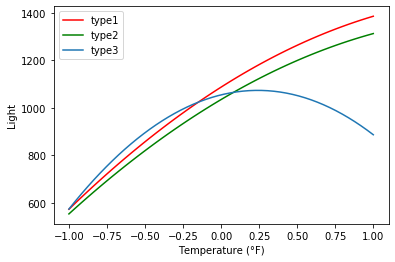

In [17]:
# 拟合响应曲线
temp = np.linspace(-1, 1)
life_type1 = param[0] + param[1] * temp + param[2] * list_B1[0] + param[3] * list_B2[0] + param[4] * (temp ** 2) + param[5] * temp * list_B1[0] + param[6] * temp * list_B2[0] + param[7] * (temp ** 2) * list_B1[0] + param[8] * (temp ** 2) * list_B2[0]
life_type2 = param[0] + param[1] * temp + param[2] * list_B1[1] + param[3] * list_B2[1] + param[4] * (temp ** 2) + param[5] * temp * list_B1[1] + param[6] * temp * list_B2[1] + param[7] * (temp ** 2) * list_B1[1] + param[8] * (temp ** 2) * list_B2[1]
life_type3 = param[0] + param[1] * temp + param[2] * list_B1[2] + param[3] * list_B2[2] + param[4] * (temp ** 2) + param[5] * temp * list_B1[2] + param[6] * temp * list_B2[2] + param[7] * (temp ** 2) * list_B1[2] + param[8] * (temp ** 2) * list_B2[2]

c1 = pd.Series(life_type1, index = temp, name = 'type1')
c2 = pd.Series(life_type2, index = temp, name = 'type2')
c3 = pd.Series(life_type3, index = temp, name = 'type3')
df = pd.concat([c1, c2, c3], axis = 1)

plt.plot(df.iloc[:,0], color = 'red', label = 'type1')
plt.plot(df.iloc[:,1], color = 'green', label = 'type2')
plt.plot(df.iloc[:,2], label = 'type3')
plt.xlabel('Temperature (°F)')
plt.ylabel('Light')
plt.legend(['type1', 'type2', 'type3'])

拟合曲线[-1, 1]：  
材料类型为 1：  
$y =1087.33 + 406.66 ∗ Temp - 108 ∗ Temp^2 $  
材料类型为 2：  
$y = 1035 + 380 ∗ Temp − 102 ∗ Temp^2$  
材料类型为 3：  
$y = 1054.67 + 156.66 ∗ Temp − 324.66 ∗ Temp^2$  

上图显示了这 3 个预测公式声称的响应曲线。